# LeNet

```{note}
现在我们已经有了组成卷积神经网络（Convolutional Neural Networks, CNN）的所有模块，可以开始组装了。<br/>
LeNet是最早发布的卷积神经网络之一，它由 Yann LeCun 在1989年提出，目的是识别手写数字。
```

## 结构

总的来说, LeNet (LeNet-5) 由两部分组成: 

1. 由两个卷积层构成的卷积编码器

2. 三个全连接层

![jupyter](../images/d/lenet.svg)

```{tip}
一般来说，随着网络的深入：<br/>
分辨率会越来越低，使得神经元的感受野增加，能捕捉更复杂的模式；<br/>
通道数越来越多，使得我们能捕捉数量更多的更分化的模式。
```

更简洁的结构图：

![jupyter](../images/d/lenet-vert.svg)

## 实现

In [1]:
import torch
from torch import nn

# 使用nn.Sequential定义
# LeNet使用的是 sigmoid & avg_pooling
net = torch.nn.Sequential(nn.Conv2d(1, 6, kernel_size=5,padding=2), nn.Sigmoid(),
                          nn.AvgPool2d(kernel_size=2, stride=2),
                          nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
                          nn.AvgPool2d(kernel_size=2, stride=2), 
                          nn.Flatten(),
                          nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
                          nn.Linear(120, 84), nn.Sigmoid(), 
                          nn.Linear(84, 10))

In [2]:
# (batch_size, channel, h, w)
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
# check shape
for layer in net:
    X = layer(X)
    # 层名: output shape
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


## 训练

In [3]:
import d2l

# 获取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

loss 0.343, train acc 0.870700, test acc  0.864500


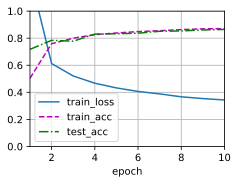

In [4]:
# 训练，最好还是GPU
lr, num_epochs = 0.01, 10
d2l.train_image_classifier(net, train_iter, test_iter, lr, num_epochs)